In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


# Pandas Printing Options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style('white')

# LOAD 

In [2]:
# FOR THE HEATMAP, WE'LL JUST USE JAN 2013 - DEC 2016 TO KEEP IT SIMPLE
injuries = pd.read_csv("../data/injuries_2013_2016.csv", index_col=['DATE'], parse_dates=['DATE'])

# INSPECT

In [3]:
injuries.head()

,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-10-24 09:10:00,9:10,NaN,nan,nan,nan,NaN,UTICA AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Unsafe Speed,NaN,NaN,NaN,NaN,3547982,NaN,NaN,NaN,NaN,NaN
2016-12-24 08:30:00,8:30,NaN,nan,nan,nan,NaN,NaN,NaN,2239 FOREST AVENUE,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3585912,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
2016-12-14 08:11:00,8:11,NaN,nan,nan,nan,NaN,155 STREET,NaN,NaN,1,0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,3584783,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2016-12-13 14:50:00,14:50,NaN,nan,nan,nan,NaN,WEST 152 STREET,NaN,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3579384,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
2016-11-30 16:11:00,16:11,NaN,nan,nan,nan,NaN,LACONIA AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3570527,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


# PLOT HOUR BY DAYOFWEEK

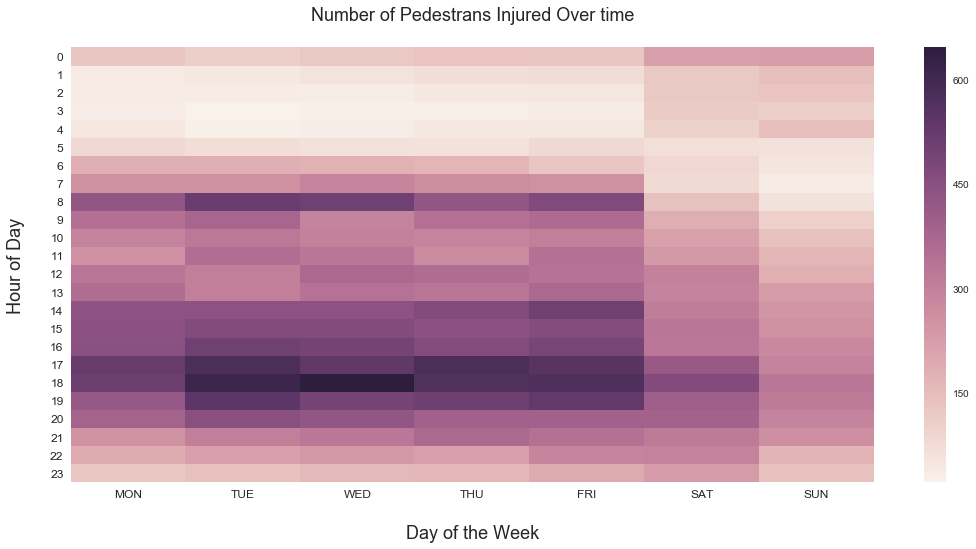

In [4]:
plt.figure(figsize=(18, 8))
dayofweek = injuries.groupby([injuries.index.dayofweek, injuries.index.hour])['NUMBER OF PEDESTRIANS INJURED'].sum().unstack().T
sns.heatmap(dayofweek)
plt.xticks(np.arange(7) + .5, ('MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'))
plt.yticks(rotation=0)
plt.ylabel('Hour of Day\n', size=18)
plt.xlabel('\nDay of the Week', size=18)
plt.yticks(rotation=0, size=12)
plt.xticks(rotation=0, size=12)
plt.title("Number of Pedestrans Injured Over time\n", size=18, );

In [5]:
dayofweek

,0,1,2,3,4,5,6
0,128,107,122,130,129,221,225
1,40,46,60,69,74,124,146
2,39,38,34,45,50,122,133
3,34,22,29,31,39,116,106
4,50,29,32,44,45,102,146
5,84,71,62,63,81,68,63
6,183,181,177,170,127,87,52
7,259,259,288,268,259,79,37
8,431,516,505,429,470,139,62
9,347,376,292,345,362,187,103


# PLOT HOUR BY WEEK OF YEAR

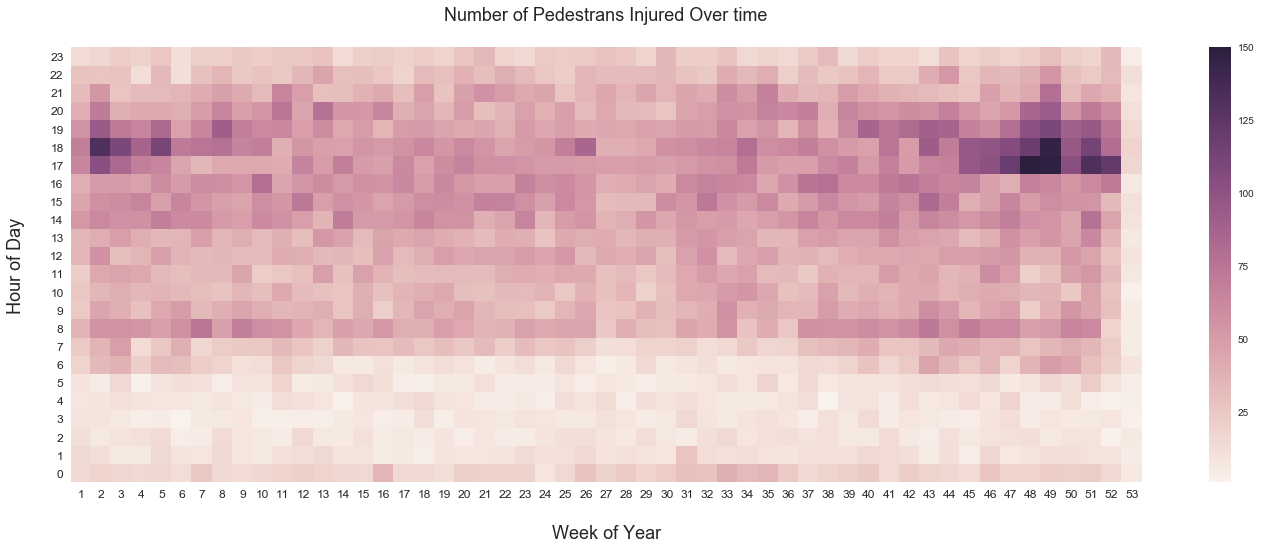

In [6]:
plt.figure(figsize=(24, 8))
hour_by_year = injuries.groupby([injuries.index.weekofyear, injuries.index.hour])['NUMBER OF PEDESTRIANS INJURED'].sum().unstack().T
hour_by_year = hour_by_year.iloc[::-1]
sns.heatmap(hour_by_year)
plt.ylabel('Hour of Day\n', size=18)
plt.xlabel('\nWeek of Year', size=18)
plt.yticks(rotation=0, size=12)
plt.xticks(rotation=0, size=12)
plt.title("Number of Pedestrans Injured Over time\n", size=18, );

In [7]:
hour_by_year

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
23,14,17,23,20,26,12,21,21,25,22,26,26,28,14,21,23,20,23,18,27,34,19,15,24,23,24,28,26,18,35,22,22,28,15,18,15,24,33,15,23,18,18,13,28,19,23,19,22,30,21,18,34,4
22,28,27,28,13,34,12,29,36,25,28,25,35,46,30,31,26,19,33,30,38,31,40,33,26,22,36,32,32,33,35,28,25,41,34,40,21,32,25,28,36,24,24,41,53,26,35,34,39,54,29,24,33,12
21,32,54,27,32,33,36,41,48,42,33,65,49,30,31,38,43,31,49,28,48,57,50,42,45,27,36,44,36,45,36,45,41,60,50,67,41,34,36,50,43,38,36,33,30,27,48,37,43,79,33,44,38,8
20,39,71,39,42,42,40,50,65,49,55,74,45,77,54,53,64,39,46,35,50,31,37,47,38,48,32,43,34,33,27,45,49,57,56,66,63,69,40,65,58,54,60,58,67,54,45,53,85,93,56,72,60,11
19,56,94,72,64,84,47,65,91,69,62,63,49,60,43,50,36,50,51,46,42,45,38,51,44,49,42,44,43,47,46,51,50,63,47,55,36,58,38,61,87,74,82,90,87,67,60,79,102,110,89,95,74,15
18,68,132,110,86,112,72,75,78,66,68,39,54,48,47,55,52,56,63,54,62,55,46,50,54,68,85,39,39,43,58,59,63,65,79,59,62,68,58,51,47,75,50,92,70,96,99,106,118,146,95,113,80,18
17,64,103,84,69,64,45,35,43,43,43,41,66,50,68,51,48,62,47,60,66,58,57,55,51,52,50,49,49,50,48,52,56,58,71,51,48,49,62,67,52,67,51,65,67,96,101,119,150,148,103,132,122,17
16,39,51,51,47,60,51,60,59,55,79,45,55,60,52,57,56,63,50,63,53,48,49,67,59,61,54,40,41,46,41,62,66,64,62,44,57,76,78,61,61,71,76,69,64,66,48,40,67,63,54,62,71,6
15,45,58,60,65,48,64,55,48,45,59,54,73,49,57,54,46,52,59,60,57,67,66,58,48,62,53,32,34,34,60,54,73,57,51,61,42,51,63,55,51,66,59,83,69,40,48,64,50,59,56,55,34,11
14,53,62,57,58,69,61,61,52,49,61,57,49,37,70,51,51,55,64,56,56,39,46,65,35,50,55,37,40,54,44,53,49,51,44,49,54,64,54,62,62,68,52,65,60,53,60,68,57,55,45,77,46,10
